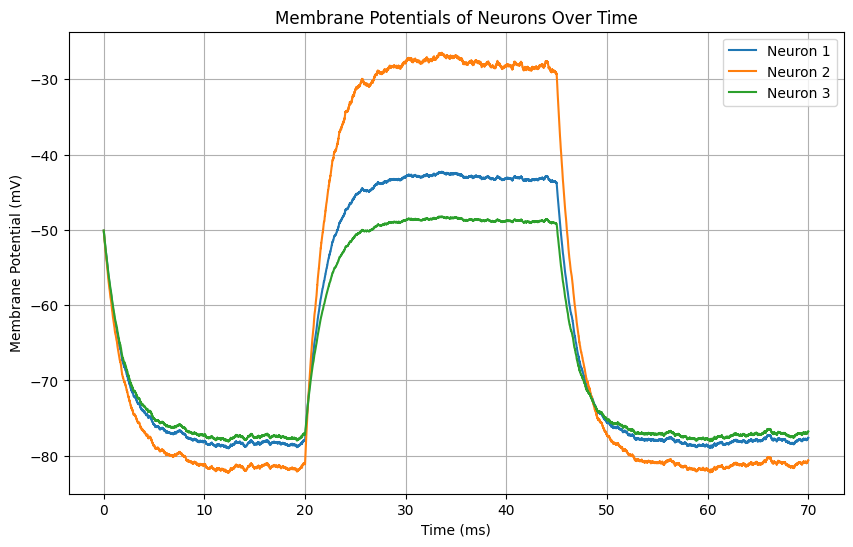

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class LIFNeuron:
    def __init__(self, V_0=-60.0, tau=2.0):
        self.V_0 = V_0
        self.tau = tau
        self.v = -50.0  # Initial membrane potential
        self.current_on = np.random.uniform(0, 20)  # Initial on input current
        self.current_off = np.random.uniform(0, 20)  # Initial off input current
        self.weights = [np.random.uniform(0.5, 2.0), np.random.uniform(-2.0, -0.5)]  # Excitatory and inhibitory synaptic weights

    def integrate_and_fire(self, t, dt, current_on_constant, current_off_constant):
        dv = -(self.v - self.V_0) / self.tau

        # Randomly choose a new tau value every 200 milliseconds
        if np.random.uniform(0, 1) < dt / 200:
            self.tau = np.random.uniform(2, 10)

        # Keep two currents constant
        self.current_on = current_on_constant
        self.current_off = current_off_constant

        # Add the current_on or current_off based on the time, scaled by weights
        if 20.0 < t < 45.0:
            dv += self.weights[0] * self.current_on  # Excitatory synaptic weight
        else:
            dv += self.weights[1] * self.current_off  # Inhibitory synaptic weight

        self.v += dv * dt
        return self.v

# Simulation parameters
dt = 1.0 / 200.0
simulation_time = 70.0
num_neurons = 3

neurons = [LIFNeuron() for _ in range(num_neurons)]

# Output file
output_file = open("membrane_potentials.txt", "w")
output_file.write("Time(ms), Neuron1_V(mV), Neuron2_V(mV), Neuron3_V(mV), Weight1, Weight2, Current_on, Current_off\n")

t = 0.0
while t < simulation_time:
    # Keeping two currents constant
    current_on_constant = np.random.uniform(0, 20)
    current_off_constant = np.random.uniform(0, 20)

    # Calculate membrane potential for each neuron
    membrane_potentials = [neuron.integrate_and_fire(t, dt, current_on_constant, current_off_constant) for neuron in neurons]

    # Write data to the output file
    output_file.write(f"{t}, {membrane_potentials[0]}, {membrane_potentials[1]}, {membrane_potentials[2]}, "
                      f"{neurons[0].weights[0]}, {neurons[0].weights[1]}, "
                      f"{current_on_constant}, {current_off_constant}\n")

    t += dt

output_file.close()


# Load data from the output file
data = np.genfromtxt('membrane_potentials.txt', delimiter=',', skip_header=1)

# Extracting time and membrane potentials for each neuron
time = data[:, 0]
neuron1_v = data[:, 1]
neuron2_v = data[:, 2]
neuron3_v = data[:, 3]

# Plotting the membrane potentials
plt.figure(figsize=(10, 6))
plt.plot(time, neuron1_v, label='Neuron 1')
plt.plot(time, neuron2_v, label='Neuron 2')
plt.plot(time, neuron3_v, label='Neuron 3')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential (mV)')
plt.title('Membrane Potentials of Neurons Over Time')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load the data
data_path = 'your_file_path.csv'  # Replace with your CSV file path
data = pd.read_csv(data_path)

# Prepare the features (X)
X = data[['Neuron1_V_mV', 'Neuron2_V_mV', 'Neuron3_V_mV']]  # Replace with actual column names

# Since we do not have a direct target for Neuron4's activation, we create a model to estimate it.
# Here we assume that the initial weights are columns in the CSV.
# If not, you will have to set them manually.
weights = data[['Weight1', 'Weight2']].values  # Replace with actual weight column names if different

# For simplicity, let's calculate Neuron4's activation as a weighted sum of Neurons 1-3's activations
data['Neuron4_Activation'] = np.dot(X, weights.T)

# Initialize and train the linear regression model to fit Neuron4's activation based on the membrane potentials
model = LinearRegression()
model.fit(X, data['Neuron4_Activation'])

# Display the coefficients and intercept of the model
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# Use the model to predict Neuron4 activation (although we already have it calculated, this is for demonstration)
predicted_activation = model.predict(X)
data['Predicted_Neuron4_Activation'] = predicted_activation

# Plot the neuron activations over time
plt.figure(figsize=(14, 7))
plt.plot(data['Time_ms'], data['Neuron1_V_mV'], label='Neuron 1 Activation')
plt.plot(data['Time_ms'], data['Neuron2_V_mV'], label='Neuron 2 Activation')
plt.plot(data['Time_ms'], data['Neuron3_V_mV'], label='Neuron 3 Activation')
plt.plot(data['Time_ms'], data['Neuron4_Activation'], label='Calculated Neuron 4 Activation', linestyle='--')
plt.plot(data['Time_ms'], data['Predicted_Neuron4_Activation'], label='Predicted Neuron 4 Activation', linestyle=':', color='red')

# Label the plot
plt.title('Neuron Activations Over Time')
plt.xlabel('Time (ms)')
plt.ylabel('Activation (arbitrary units)')
plt.legend()
plt.grid(True)
plt.show()

# Save the updated data with Neuron4 activation
output_path = 'updated_membrane_potentials.csv'  # Replace with your desired output CSV file path
data.to_csv(output_path, index=False)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

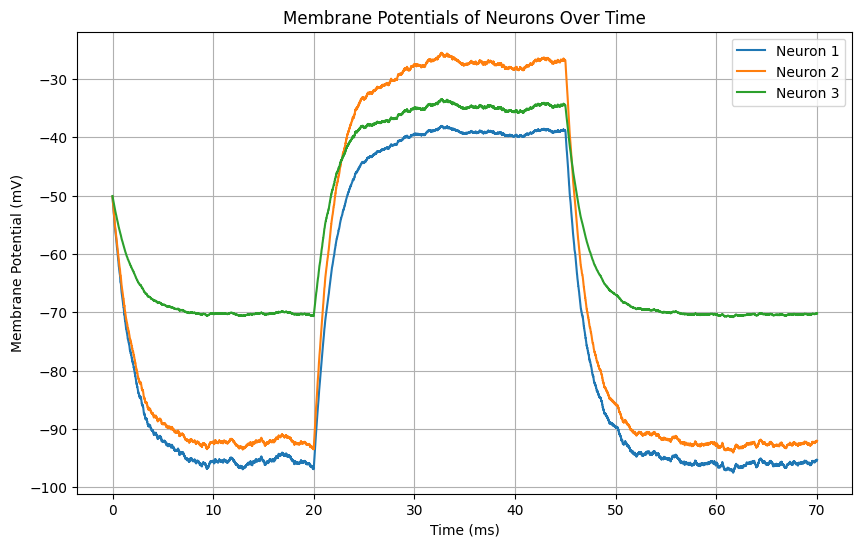

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

class LIFNeuron:
    def __init__(self, V_0=-60.0, tau=2.0):
        self.V_0 = V_0
        self.tau = tau
        self.v = -50.0  # Initial membrane potential
        self.current_on = np.random.uniform(0, 20)  # Initial on input current
        self.current_off = np.random.uniform(0, 20)  # Initial off input current
        self.weights = [np.random.uniform(0.5, 2.0), np.random.uniform(-2.0, -0.5)]  # Excitatory and inhibitory synaptic weights

    def integrate_and_fire(self, t, dt, current_on_constant, current_off_constant):
        dv = -(self.v - self.V_0) / self.tau

        # Keep two currents constant
        self.current_on = current_on_constant
        self.current_off = current_off_constant

        # Add the current_on or current_off based on the time, scaled by weights
        if 20.0 < t < 45.0:
            dv += self.weights[0] * self.current_on  # Excitatory synaptic weight
        else:
            dv += self.weights[1] * self.current_off  # Inhibitory synaptic weight

        self.v += dv * dt
        return self.v

# Simulation parameters
dt = 1.0 / 200.0
simulation_time = 70.0
num_neurons = 3
tau_constant = 2.0

neurons = [LIFNeuron(tau=tau_constant) for _ in range(num_neurons)]

# Create list to store DataFrames
dfs = []

t = 0.0
while t < simulation_time:
    # Keeping two currents constant
    current_on_constant = np.random.uniform(0, 20)
    current_off_constant = np.random.uniform(0, 20)

    # Calculate membrane potential for each neuron
    membrane_potentials = [neuron.integrate_and_fire(t, dt, current_on_constant, current_off_constant) for neuron in neurons]

    # Append data to DataFrame
    dfs.append(pd.DataFrame({"Time(ms)": [t], "Neuron1_V(mV)": [membrane_potentials[0]], "Neuron2_V(mV)": [membrane_potentials[1]],
                    "Neuron3_V(mV)": [membrane_potentials[2]], "Weight1": [neurons[0].weights[0]], "Weight2": [neurons[0].weights[1]],
                    "Current_on": [current_on_constant], "Current_off": [current_off_constant]}))

    t += dt

# Concatenate DataFrames
df = pd.concat(dfs, ignore_index=True)

# Save DataFrame to an Excel file
df.to_excel('membrane_potentials.xlsx', index=False)

# Plotting the graph
plt.figure(figsize=(10, 6))
plt.plot(df["Time(ms)"], df["Neuron1_V(mV)"], label='Neuron 1')
plt.plot(df["Time(ms)"], df["Neuron2_V(mV)"], label='Neuron 2')
plt.plot(df["Time(ms)"], df["Neuron3_V(mV)"], label='Neuron 3')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential (mV)')
plt.title('Membrane Potentials of Neurons Over Time')
plt.legend()
plt.grid(True)
plt.show()


#Time(ms): The time in milliseconds, indicating the time at which the membrane potential data was recorded.
#Neuron1_V(mV): The membrane potential of Neuron 1 in millivolts (mV) at the corresponding time.
#Neuron2_V(mV): The membrane potential of Neuron 2 in millivolts (mV) at the corresponding time.
#Neuron3_V(mV): The membrane potential of Neuron 3 in millivolts (mV) at the corresponding time.
#Weight1: The synaptic weight (excitatory) applied to Neuron 1.
#Weight2: The synaptic weight (inhibitory) applied to Neuron 1.
#Current_on: The constant input current applied to the neurons during the simulation.
#Current_off: The constant input current applied to the neurons during the simulation.
#I1: The adjusted input current for Neuron 1, calculated based on Weight1 and the constant input current (Current_on).
#I2: The adjusted input current for Neuron 2, calculated based on Weight1 and the constant input current (Current_on).
#I3: The adjusted input current for Neuron 3, calculated based on Weight1 and the constant input current (Current_on).
#A1: The membrane potential adjustment for Neuron 1 at the corresponding time.
#A2: The membrane potential adjustment for Neuron 2 at the corresponding time.
#A3: The membrane potential adjustment for Neuron 3 at the corresponding time.



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

class LIFNeuron:
    def __init__(self, V_0=-60.0, tau=2.0):
        self.V_0 = V_0
        self.tau = tau
        self.v = -50.0  # Initial membrane potential
        self.current_on = np.random.uniform(0, 20)  # Initial on input current
        self.current_off = np.random.uniform(0, 20)  # Initial off input current

    def integrate_and_fire(self, t, dt):
        dv = -(self.v - self.V_0) / self.tau

        # Randomly choose a new tau value every 200 milliseconds
        if np.random.uniform(0, 1) < dt / 200:
            self.tau = np.random.uniform(2, 10)

        # Change current_on and current_off every 5 seconds
        if np.random.uniform(0, 1) < dt / 1000:
            self.current_on = np.random.uniform(0, 20)
            self.current_off = np.random.uniform(0, 20)

        # Excitatory and inhibitory synaptic weights
        self.weight_on = np.random.uniform(0.5, 2.0)  # Excitatory synaptic weight
        self.weight_off = np.random.uniform(-2.0, -0.5)  # Inhibitory synaptic weight

        # Add the current_on or current_off based on the time, scaled by weights
        if 20.0 < t < 45.0:
            dv += self.weight_on * self.current_on
        else:
            dv += self.weight_off * self.current_off

        self.v += dv * dt

# Read input from the Excel file
df = pd.read_excel("membrane_potentials.xlsx")

# Extract required columns
neuron_data = df[['Neuron1_V(mV)', 'Neuron2_V(mV)', 'Neuron3_V(mV)']].values
weights = df[['Weight1', 'Weight2']].values
input_currents = df[['Current_on', 'Current_off']].values

# Ensure input_currents has the same number of rows as neuron_data
input_currents = np.repeat(input_currents, neuron_data.shape[0] // input_currents.shape[1], axis=0)

# Calculate activations using matrix multiplication
activations = np.dot(neuron_data, weights.T) + np.dot(input_currents, weights.T)

# Write activations to an output file
output_df = pd.DataFrame({'Activation_of_center_neuron': activations[:, 1]})
output_df.to_excel("center_neuron_activations.xlsx", index=False)

print("Activations of Center Neuron:", activations[:, 1])

# Plot membrane potential of each neuron over time
num_neurons = 3
fig, axes = plt.subplots(nrows=num_neurons, ncols=1, figsize=(12, 9), dpi=180, sharex=True)
for i in range(num_neurons):
    ax = axes[i]
    ax.plot(df['Time(ms)'], df[f'Neuron{i+1}_V(mV)'])
    ax.set_ylabel(f'Neuron {i+1}\nMembrane Potential (mV)')
    ax.set_xlabel('Time (ms)')

plt.tight_layout()
plt.savefig("lif_multiple_neurons.png")
plt.show()

# Output activations
print("Activations of Neurons:", activations)


ValueError: shapes (14000,3) and (2,14000) not aligned: 3 (dim 1) != 2 (dim 0)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load the data from the Excel file
df = pd.read_excel("membrane_potentials.xlsx")

# Assuming 'Neuron1_V(mV)' is the column for the membrane potentials of Neuron 1
# Create lagged features for the membrane potentials of Neuron 1
df['v1_lag1'] = df['Neuron1_V(mV)'].shift(1)
df['v1_lag2'] = df['Neuron1_V(mV)'].shift(2)
df['v1_lag3'] = df['Neuron1_V(mV)'].shift(3)

# Drop rows with NaN values resulting from the shifting
df.dropna(inplace=True)

# Select features (lagged membrane potentials of Neuron 1) and target (activation of Neuron 2)
X = df[['v1_lag1', 'v1_lag2', 'v1_lag3']].values
y = df['Neuron2_V(mV)'].values  # Activation of Neuron 2

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Evaluate the model
train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))

print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)

# Predict activation of Neuron 2 based on new membrane potentials of Neuron 1
# Assuming you have a new sample with membrane potentials of Neuron 1
# Replace v1_lag1, v1_lag2, v1_lag3 with actual values
new_sample = np.array([[v1_lag1, v1_lag2, v1_lag3]])
predicted_activation = model.predict(new_sample)
print("Predicted Activation of Neuron 2:", predicted_activation)


Train RMSE: 1.1229274382358267
Test RMSE: 1.172224192515142


NameError: name 'v1_lag1' is not defined

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# Load the data from the Excel file
df = pd.read_excel("membrane_potentials.xlsx")

# Assuming 'Neuron1_V(mV)', 'Neuron2_V(mV)', and 'Neuron3_V(mV)' are the columns for the membrane potentials of Neuron 1, Neuron 2, and Neuron 3 respectively
# Create lagged features for the membrane potentials of Neuron 1, Neuron 2, and Neuron 3
df['v1_lag1'] = df['Neuron1_V(mV)'].shift(1)
df['v1_lag2'] = df['Neuron1_V(mV)'].shift(2)
df['v1_lag3'] = df['Neuron1_V(mV)'].shift(3)

df['v2_lag1'] = df['Neuron2_V(mV)'].shift(1)
df['v2_lag2'] = df['Neuron2_V(mV)'].shift(2)
df['v2_lag3'] = df['Neuron2_V(mV)'].shift(3)

df['v3_lag1'] = df['Neuron3_V(mV)'].shift(1)
df['v3_lag2'] = df['Neuron3_V(mV)'].shift(2)
df['v3_lag3'] = df['Neuron3_V(mV)'].shift(3)

# Drop rows with NaN values resulting from the shifting
df.dropna(inplace=True)

# Create an empty DataFrame to store the results
results_df = pd.DataFrame(columns=['Time(ms)', 'Activation_Neuron4'])

# Create and train the linear regression model
model = LinearRegression()

# Iterate over each time point
for index, row in df.iterrows():
    # Create the new sample array with membrane potentials of Neuron 1, Neuron 2, and Neuron 3 at the current time point
    new_sample = np.array([[row['v1_lag1'], row['v1_lag2'], row['v1_lag3'],
                             row['v2_lag1'], row['v2_lag2'], row['v2_lag3'],
                             row['v3_lag1'], row['v3_lag2'], row['v3_lag3']]])

    # Predict activation of Neuron 4 based on membrane potentials of Neuron 1, Neuron 2, and Neuron 3 at the current time point
    predicted_activation = model.predict(new_sample)[0]

    # Store the results in the results DataFrame
    results_df = results_df.append({'Time(ms)': row['Time(ms)'], 'Activation_Neuron4': predicted_activation}, ignore_index=True)

# Write the results to an output Excel file
results_df.to_excel("predicted_activations_neuron4.xlsx", index=False)


NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.